# Airbnb Vancouver — Exploratory Data Analysis
This notebook explores the Airbnb dataset stored in PostgreSQL.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv

os.makedirs("dashboards", exist_ok=True)

load_dotenv()

engine = create_engine(
    f"postgresql+psycopg://{os.getenv('PGUSER')}:{os.getenv('PGPASSWORD')}"
    f"@{os.getenv('PGHOST')}:{os.getenv('PGPORT')}/{os.getenv('PGDATABASE')}"
)

sns.set(style="whitegrid")

## 1. Median Price by Neighbourhood

/var/folders/rh/phxs6w_504b0lv9n95jtd5rw0000gn/T/ipykernel_15115/353587007.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="median_price", y="neighbourhood", palette="viridis")


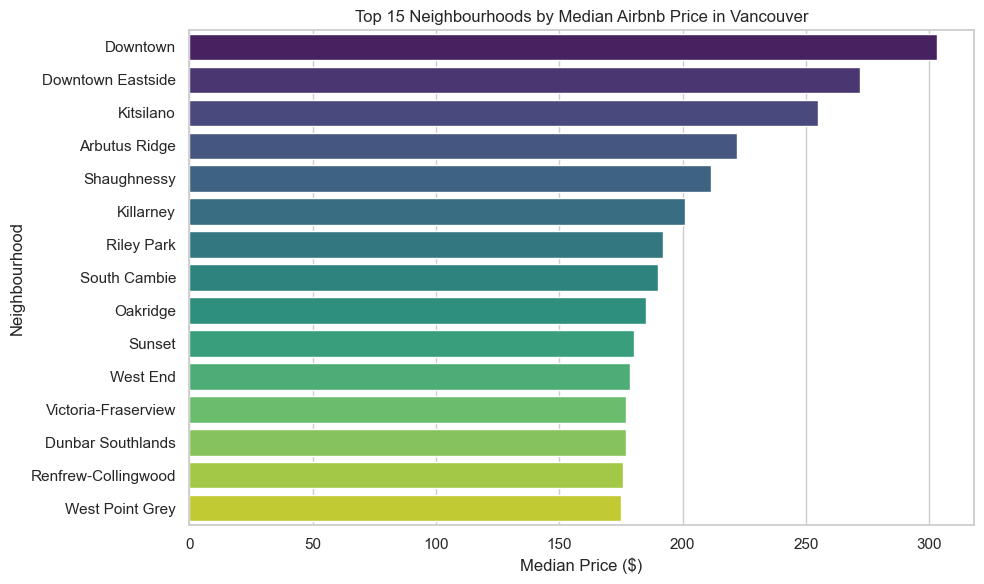

In [2]:
query = """
SELECT neighbourhood, 
       PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY price) AS median_price,
       COUNT(*) AS n_listings
FROM analytics.listings
WHERE price IS NOT NULL
GROUP BY neighbourhood
HAVING COUNT(*) >= 30
ORDER BY median_price DESC
LIMIT 15;
"""
df = pd.read_sql(query, engine)

plt.figure(figsize=(10,6))
sns.barplot(data=df, x="median_price", y="neighbourhood", palette="viridis")
plt.title("Top 15 Neighbourhoods by Median Airbnb Price in Vancouver")
plt.xlabel("Median Price ($)")
plt.ylabel("Neighbourhood")
plt.tight_layout()
plt.savefig("dashboards/median_price_neighbourhood.png")
plt.show()

## 2. Median Price by Room Type

/var/folders/rh/phxs6w_504b0lv9n95jtd5rw0000gn/T/ipykernel_15115/1402649335.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="room_type", y="median_price", palette="muted")


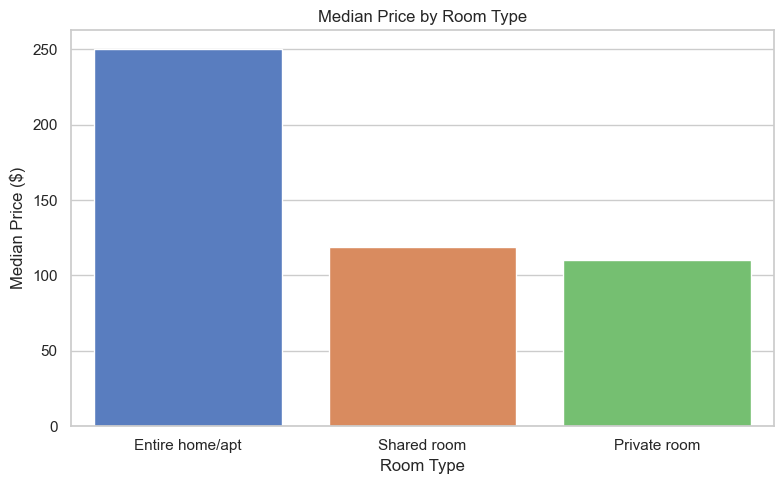

In [3]:
query = """
SELECT room_type, 
       PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY price) AS median_price,
       COUNT(*) AS n_listings
FROM analytics.listings
WHERE price IS NOT NULL
GROUP BY room_type
ORDER BY median_price DESC;
"""
df = pd.read_sql(query, engine)

plt.figure(figsize=(8,5))
sns.barplot(data=df, x="room_type", y="median_price", palette="muted")
plt.title("Median Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Median Price ($)")
plt.tight_layout()
plt.savefig("dashboards/median_price_roomtype.png")
plt.show()

## 3. Availability Trend (2025)

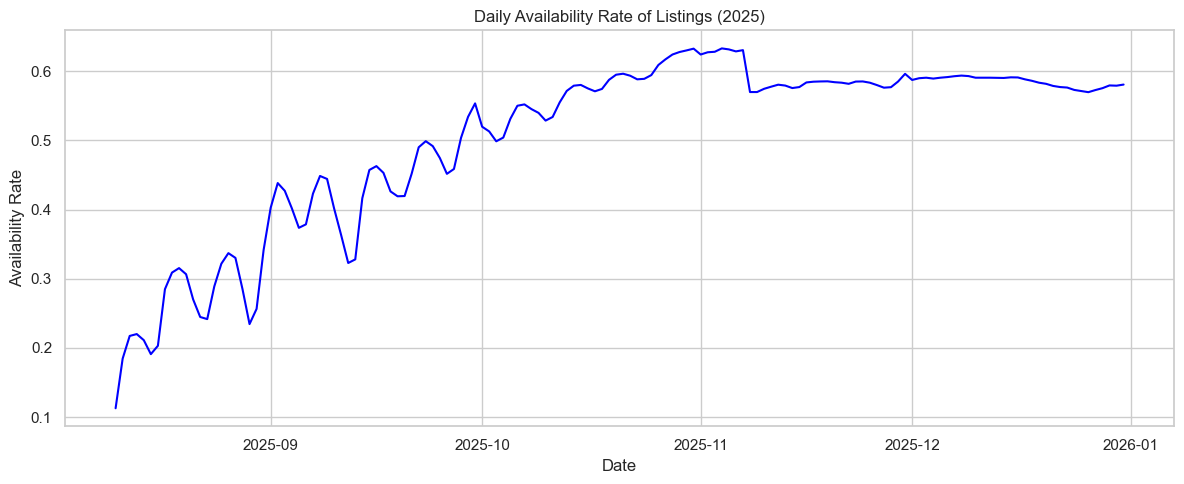

In [6]:
query = """
SELECT date, 
       AVG(CASE WHEN available THEN 1 ELSE 0 END)::float AS availability_rate
FROM analytics.calendar
WHERE date BETWEEN '2025-01-01' AND '2025-12-31'
GROUP BY date
ORDER BY date;
"""
df = pd.read_sql(query, engine)

plt.figure(figsize=(12,5))
plt.plot(df["date"], df["availability_rate"], color="blue")
plt.title("Daily Availability Rate of Listings (2025)")
plt.ylabel("Availability Rate")
plt.xlabel("Date")
plt.tight_layout()
plt.savefig("dashboards/availability_trend.png")
plt.show()